In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
data = pd.read_csv("titanic.csv")

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  WikiId       1304 non-null   float64
 13  Name_wiki    1304 non-null   object 
 14  Age_wiki     1302 non-null   float64
 15  Hometown     1304 non-null   object 
 16  Boarded      1304 non-null   object 
 17  Destination  1304 non-null   object 
 18  Lifeboat     502 non-null    object 
 19  Body  

In [11]:
data.shape

(1309, 21)

In [12]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


In [22]:
data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
WikiId            5
Name_wiki         5
Age_wiki          7
Hometown          5
Boarded           5
Destination       5
Lifeboat        807
Body           1179
Class             5
dtype: int64

In [24]:
data.isnull().sum()/len("data")

PassengerId      0.00
Survived       104.50
Pclass           0.00
Name             0.00
Sex              0.00
Age             65.75
SibSp            0.00
Parch            0.00
Ticket           0.00
Fare             0.25
Cabin          253.50
Embarked         0.50
WikiId           1.25
Name_wiki        1.25
Age_wiki         1.75
Hometown         1.25
Boarded          1.25
Destination      1.25
Lifeboat       201.75
Body           294.75
Class            1.25
dtype: float64

In [16]:
data["Destination"].value_counts()

New York City                    234
New York, New York, US           127
Chicago, Illinois, US             75
Montreal, Quebec, Canada          37
Detroit, Michigan, US             28
                                ... 
Morris Plains, New Jersey, US      1
Dobbs Ferry, New York, US          1
Fingal, North Dakota, US           1
Waban, Massachusetts, US           1
Beresford, South Dakota, US        1
Name: Destination, Length: 291, dtype: int64

In [113]:
data["Destination"]=data["Destination"].replace(np.nan, "New York City")

In [116]:
data.isnull().sum()/len("data")

PassengerId      0.00
Survived       104.50
Pclass           0.00
Name             0.00
Sex              0.00
SibSp            0.00
Parch            0.00
Ticket           0.00
Fare             0.25
Cabin          253.50
Embarked         0.50
WikiId           1.25
Hometown         1.25
Boarded          1.25
Destination      0.00
Class            0.00
Age_wikie        0.00
agegroup         2.50
dtype: float64

In [114]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,WikiId,Hometown,Boarded,Destination,Class,Age_wikie,agegroup
0,1,0.0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S,691.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",3,22,16-32
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,90.0,"New York, New York, US",Cherbourg,"New York, New York, US",1,35,32-48
2,3,1.0,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S,865.0,"Jyväskylä, Finland",Southampton,New York City,3,26,16-32
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,127.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",1,35,32-48
4,5,0.0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S,627.0,"Birmingham, West Midlands, England",Southampton,New York City,3,35,32-48


In [26]:
data["Sex"].value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [27]:
data.groupby("Sex").count()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
Sex,,,,,,,,,,,,,,,,,,,,
female,466,314,466,466,388,466,466,466,466,141,464,463,463,463,463,463,463,337,11,463
male,843,577,843,843,658,843,843,843,842,154,843,841,841,839,841,841,841,165,119,841


In [30]:
data.drop(["Name_wiki"], axis=1, inplace=True)

In [31]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,WikiId,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,691.0,22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,90.0,35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,865.0,26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,127.0,35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,627.0,35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


In [32]:
data.isnull().sum()/len("data")

PassengerId      0.00
Survived       104.50
Pclass           0.00
Name             0.00
Sex              0.00
Age             65.75
SibSp            0.00
Parch            0.00
Ticket           0.00
Fare             0.25
Cabin          253.50
Embarked         0.50
WikiId           1.25
Age_wiki         1.75
Hometown         1.25
Boarded          1.25
Destination      1.25
Lifeboat       201.75
Body           294.75
Class            1.25
dtype: float64

In [35]:
data.drop(["Age"], axis=1, inplace=True)

In [36]:
data.isnull().sum()/len("data")

PassengerId      0.00
Survived       104.50
Pclass           0.00
Name             0.00
Sex              0.00
SibSp            0.00
Parch            0.00
Ticket           0.00
Fare             0.25
Cabin          253.50
Embarked         0.50
WikiId           1.25
Age_wiki         1.75
Hometown         1.25
Boarded          1.25
Destination      1.25
Lifeboat       201.75
Body           294.75
Class            1.25
dtype: float64

In [37]:
data["Age_wiki"].value_counts()

22.00    62
24.00    56
21.00    51
28.00    47
18.00    46
         ..
69.00     1
70.00     1
0.92      1
67.00     1
0.17      1
Name: Age_wiki, Length: 78, dtype: int64

In [38]:
data.groupby("Age_wiki").count()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,WikiId,Hometown,Boarded,Destination,Lifeboat,Body,Class
Age_wiki,,,,,,,,,,,,,,,,,,
0.17,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1
0.33,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,0,0,1
0.42,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1
0.58,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,0,0,1
0.75,2,2,2,2,2,2,2,2,2,0,2,2,2,2,2,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67.00,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1
69.00,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,0,0,1
70.00,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1


In [70]:
# hier bitte befor ausführen einen anderen namen geben!!! Da sonst die gleichnahmige Spalte in der Tabelle stehen bleibt!
data["Age_wiki 1"]=data["Age_wiki"].replace(np.nan, "22")

KeyError: 'Age_wiki'

In [71]:
data.isnull().sum()/len("data")

PassengerId      0.00
Survived       104.50
Pclass           0.00
Name             0.00
Sex              0.00
SibSp            0.00
Parch            0.00
Ticket           0.00
Fare             0.25
Cabin          253.50
Embarked         0.50
WikiId           1.25
Hometown         1.25
Boarded          1.25
Destination      1.25
Lifeboat       201.75
Body           294.75
Class            1.25
Age_wikie        0.00
agegroup         2.50
dtype: float64

In [58]:
data['Age_wiki'] = data['Age_wiki'].astype(int)

In [59]:
data['Age_wiki'].median()

27.0

In [61]:
bins = [0,16,32,48,64,200]
labels = ['0-16', '16-32', '32-48', '48-64', '64+']
data['agegroup']=pd.cut(data["Age_wiki"], bins, labels = labels)

In [62]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,...,WikiId,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class,Age_wikie,agegroup
0,1,0.0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,...,691.0,22,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0,22,16-32
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,...,90.0,35,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0,35,32-48
2,3,1.0,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,...,865.0,26,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0,26,16-32
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,...,127.0,35,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0,35,32-48
4,5,0.0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,...,627.0,35,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0,35,32-48


In [183]:
data.drop(["Age_wikie"],axis=1, inplace=True)

In [184]:
data.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Hometown,Boarded,Destination,Class,agegroup
0,1,0,3,male,1,0,7.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",3,16-32
1,2,1,1,female,1,0,71.0,"New York, New York, US",Cherbourg,"New York, New York, US",1,32-48
2,3,1,3,female,0,0,8.0,"Jyväskylä, Finland",Southampton,New York City,3,16-32
3,4,1,1,female,1,0,53.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",1,32-48
4,5,0,3,male,0,0,8.0,"Birmingham, West Midlands, England",Southampton,New York City,3,32-48


In [74]:
data["Class"].value_counts()

3.0    706
1.0    326
2.0    272
Name: Class, dtype: int64

In [91]:
data.groupby("Class").count()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,WikiId,Hometown,Boarded,Destination,Lifeboat,Body,Age_wikie,agegroup
Class,,,,,,,,,,,,,,,,,,,
1,326,217,326,326,326,326,326,326,326,258,324,326,326,326,326,203,38,326,325
2,272,182,272,272,272,272,272,272,272,20,272,272,272,272,272,118,31,272,269
3,711,492,711,711,711,711,711,711,710,17,711,706,706,706,706,181,61,711,705


In [92]:
data["Class"]=data["Class"].replace(np.nan, 3.0)

In [84]:
data.isnull().sum()/len("data")

PassengerId      0.00
Survived       104.50
Pclass           0.00
Name             0.00
Sex              0.00
SibSp            0.00
Parch            0.00
Ticket           0.00
Fare             0.25
Cabin          253.50
Embarked         0.50
WikiId           1.25
Hometown         1.25
Boarded          1.25
Destination      1.25
Lifeboat       201.75
Body           294.75
Class            0.00
Age_wikie        0.00
agegroup         2.50
dtype: float64

In [89]:
data["Class"]=data["Class"].astype(int)

In [94]:
data['Class'].value_counts()

3    711
1    326
2    272
Name: Class, dtype: int64

In [95]:
data.groupby("Class").count()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,WikiId,Hometown,Boarded,Destination,Lifeboat,Body,Age_wikie,agegroup
Class,,,,,,,,,,,,,,,,,,,
1,326,217,326,326,326,326,326,326,326,258,324,326,326,326,326,203,38,326,325
2,272,182,272,272,272,272,272,272,272,20,272,272,272,272,272,118,31,272,269
3,711,492,711,711,711,711,711,711,710,17,711,706,706,706,706,181,61,711,705


In [96]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,WikiId,Hometown,Boarded,Destination,Lifeboat,Body,Class,Age_wikie,agegroup
0,1,0.0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S,691.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3,22,16-32
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,90.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1,35,32-48
2,3,1.0,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S,865.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3,26,16-32
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,127.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1,35,32-48
4,5,0.0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S,627.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3,35,32-48


In [101]:
data["Body"].value_counts(ascending=False)

3MB      1
299MB    1
55MB     1
181MB    1
43MB     1
        ..
155MB    1
256MB    1
294MB    1
32MB     1
110MB    1
Name: Body, Length: 130, dtype: int64

In [100]:
data.groupby("Body").count()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,WikiId,Hometown,Boarded,Destination,Lifeboat,Class,Age_wikie,agegroup
Body,,,,,,,,,,,,,,,,,,,
101MB,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1
103MB,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1
108MB,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1
109MB,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1
110MB,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96MB,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1
97MB,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1
98MB,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1


In [102]:
data.drop(["Body"], axis=1, inplace=True)

In [103]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,WikiId,Hometown,Boarded,Destination,Lifeboat,Class,Age_wikie,agegroup
0,1,0.0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S,691.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,3,22,16-32
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,90.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,1,35,32-48
2,3,1.0,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S,865.0,"Jyväskylä, Finland",Southampton,New York City,14?,3,26,16-32
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,127.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,1,35,32-48
4,5,0.0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S,627.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,3,35,32-48


In [117]:
data.isnull().sum()/len("data")

PassengerId      0.00
Survived       104.50
Pclass           0.00
Name             0.00
Sex              0.00
SibSp            0.00
Parch            0.00
Ticket           0.00
Fare             0.25
Cabin          253.50
Embarked         0.50
WikiId           1.25
Hometown         1.25
Boarded          1.25
Destination      0.00
Class            0.00
Age_wikie        0.00
agegroup         2.50
dtype: float64

In [106]:
data["Lifeboat"].value_counts()

13       42
C        41
15       38
14       34
4        31
5        29
10       29
11       26
3        26
9        26
8        24
16       23
7        22
6        21
12       18
D        18
2        14
?        12
A        11
B         9
1         5
15?       1
14?       1
A[64]     1
Name: Lifeboat, dtype: int64

In [107]:
data.groupby("Lifeboat").count()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,WikiId,Hometown,Boarded,Destination,Class,Age_wikie,agegroup
Lifeboat,,,,,,,,,,,,,,,,,,
1,5,3,5,5,5,5,5,5,5,4,5,5,5,5,5,5,5,5
10,29,18,29,29,29,29,29,29,29,11,29,29,29,29,29,29,29,27
11,26,16,26,26,26,26,26,26,26,11,26,26,26,26,26,26,26,24
12,18,12,18,18,18,18,18,18,18,1,18,18,18,18,18,18,18,18
13,42,26,42,42,42,42,42,42,42,6,42,42,42,42,42,42,42,41
14,34,22,34,34,34,34,34,34,34,8,34,34,34,34,34,34,34,34
14?,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1
15,38,28,38,38,38,38,38,38,38,0,38,38,38,38,38,38,38,38
15?,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1


In [108]:
data["Lifeboat"]=data["Lifeboat"].replace(np.nan, 13)

In [109]:
data.isnull().sum()/len("data")

PassengerId      0.00
Survived       104.50
Pclass           0.00
Name             0.00
Sex              0.00
SibSp            0.00
Parch            0.00
Ticket           0.00
Fare             0.25
Cabin          253.50
Embarked         0.50
WikiId           1.25
Hometown         1.25
Boarded          1.25
Destination      1.25
Lifeboat         0.00
Class            0.00
Age_wikie        0.00
agegroup         2.50
dtype: float64

In [111]:
data.drop(["Lifeboat"], axis=1, inplace=True)

In [112]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,WikiId,Hometown,Boarded,Destination,Class,Age_wikie,agegroup
0,1,0.0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S,691.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",3,22,16-32
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,90.0,"New York, New York, US",Cherbourg,"New York, New York, US",1,35,32-48
2,3,1.0,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S,865.0,"Jyväskylä, Finland",Southampton,New York City,3,26,16-32
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,127.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",1,35,32-48
4,5,0.0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S,627.0,"Birmingham, West Midlands, England",Southampton,New York City,3,35,32-48


In [119]:
data["agegroup"].value_counts()

16-32    697
32-48    332
0-16     146
48-64    113
64+       11
Name: agegroup, dtype: int64

In [120]:
data["agegroup"]=data["agegroup"].replace(np.nan, 16-32)

In [121]:
data.isnull().sum()/len("data")

PassengerId      0.00
Survived       104.50
Pclass           0.00
Name             0.00
Sex              0.00
SibSp            0.00
Parch            0.00
Ticket           0.00
Fare             0.25
Cabin          253.50
Embarked         0.50
WikiId           1.25
Hometown         1.25
Boarded          1.25
Destination      0.00
Class            0.00
Age_wikie        0.00
agegroup         2.50
dtype: float64

In [122]:
data["agegroup"].unique()

[16-32, 32-48, 48-64, 0-16, 64+, NaN]
Categories (5, object): [0-16 < 16-32 < 32-48 < 48-64 < 64+]

In [123]:
data["agegroup"]=data["agegroup"].replace(np.NaN, 16-32)

In [124]:
data.isnull().sum()/len("data")

PassengerId      0.00
Survived       104.50
Pclass           0.00
Name             0.00
Sex              0.00
SibSp            0.00
Parch            0.00
Ticket           0.00
Fare             0.25
Cabin          253.50
Embarked         0.50
WikiId           1.25
Hometown         1.25
Boarded          1.25
Destination      0.00
Class            0.00
Age_wikie        0.00
agegroup         2.50
dtype: float64

In [125]:
data["Hometown"].value_counts()

New York, New York, US                            70
London, England                                   49
London, England, UK                               30
Paris, France                                     23
Montreal, Quebec, Canada                          20
                                                  ..
Saarijärvi, Finland                                1
Aghnacliffe, Longford, Ireland                     1
Guntur, Madras Province, British India[note 3]     1
Craghbrien, Clare, Ireland                         1
Shwayhad, Syria                                    1
Name: Hometown, Length: 566, dtype: int64

In [128]:
data["Hometown"].count()

1304

In [126]:
data.groupby("Hometown").count()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,WikiId,Boarded,Destination,Class,Age_wikie,agegroup
Hometown,,,,,,,,,,,,,,,,,
"Abbeyleix, Laois, Ireland[note 1]",1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1
"Abercynon, Glamorgan, Wales",1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1
"Aberdeen, Aberdeenshire, Scotland",2,1,2,2,2,2,2,2,2,0,2,2,2,2,2,2,2
"Aberdeen, Washington, US",1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1
"Aclare, Sligo, Ireland",1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Örsjö, Kalmar, Sweden",1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1
"Östra Sallerup, Skåne, Sweden",1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1
"Øyer, Norway",1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1


In [133]:
data[data["Hometown"]=="NaN"].count()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
WikiId         0
Hometown       0
Boarded        0
Destination    0
Class          0
Age_wikie      0
agegroup       0
dtype: int64

In [134]:
data["Hometown"]=data["Hometown"].replace(np.nan, "New York")

In [136]:
data.isnull().sum()/len("data")

PassengerId      0.00
Survived       104.50
Pclass           0.00
Name             0.00
Sex              0.00
SibSp            0.00
Parch            0.00
Ticket           0.00
Fare             0.25
Cabin          253.50
Embarked         0.50
WikiId           1.25
Hometown         0.00
Boarded          1.25
Destination      0.00
Class            0.00
Age_wikie        0.00
agegroup         2.50
dtype: float64

In [137]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,WikiId,Hometown,Boarded,Destination,Class,Age_wikie,agegroup
0,1,0.0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S,691.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",3,22,16-32
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,90.0,"New York, New York, US",Cherbourg,"New York, New York, US",1,35,32-48
2,3,1.0,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S,865.0,"Jyväskylä, Finland",Southampton,New York City,3,26,16-32
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,127.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",1,35,32-48
4,5,0.0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S,627.0,"Birmingham, West Midlands, England",Southampton,New York City,3,35,32-48


In [138]:
data["Boarded"].value_counts()

Southampton    916
Cherbourg      259
Queenstown     119
Belfast         10
Name: Boarded, dtype: int64

In [139]:
data.groupby("Boarded").count()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,WikiId,Hometown,Destination,Class,Age_wikie,agegroup
Boarded,,,,,,,,,,,,,,,,,
Belfast,10,9,10,10,10,10,10,10,10,2,10,10,10,10,10,10,10
Cherbourg,259,166,259,259,259,259,259,259,259,111,259,259,259,259,259,259,257
Queenstown,119,76,119,119,119,119,119,119,119,2,119,119,119,119,119,119,119
Southampton,916,638,916,916,916,916,916,916,915,179,914,916,916,916,916,916,908


In [140]:
data["Boarded"]=data["Boarded"].replace(np.nan, "Southampton")

In [141]:
data.isnull().sum()/len("data")

PassengerId      0.00
Survived       104.50
Pclass           0.00
Name             0.00
Sex              0.00
SibSp            0.00
Parch            0.00
Ticket           0.00
Fare             0.25
Cabin          253.50
Embarked         0.50
WikiId           1.25
Hometown         0.00
Boarded          0.00
Destination      0.00
Class            0.00
Age_wikie        0.00
agegroup         2.50
dtype: float64

In [143]:
data["Cabin"].value_counts()

C23 C25 C27        6
B57 B59 B63 B66    5
G6                 5
C78                4
D                  4
                  ..
B39                1
B102               1
T                  1
B94                1
B73                1
Name: Cabin, Length: 186, dtype: int64

In [144]:
data.groupby("Cabin").count()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,WikiId,Hometown,Boarded,Destination,Class,Age_wikie,agegroup
Cabin,,,,,,,,,,,,,,,,,
A10,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
A11,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
A14,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
A16,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
A18,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F33,4,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
F38,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
F4,4,2,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4


In [145]:
data.drop(["Cabin"], axis=1, inplace=True)

In [146]:
data.isnull().sum()/len("data")

PassengerId      0.00
Survived       104.50
Pclass           0.00
Name             0.00
Sex              0.00
SibSp            0.00
Parch            0.00
Ticket           0.00
Fare             0.25
Embarked         0.50
WikiId           1.25
Hometown         0.00
Boarded          0.00
Destination      0.00
Class            0.00
Age_wikie        0.00
agegroup         2.50
dtype: float64

In [147]:
data["Fare"].value_counts()

8.0500     60
13.0000    59
7.7500     55
26.0000    50
7.8958     49
           ..
33.5000     1
7.8000      1
26.3875     1
15.5792     1
7.1417      1
Name: Fare, Length: 281, dtype: int64

In [148]:
data["Fare1"]=round(data["Fare"])

In [149]:
data["Fare1"].value_counts()

8.0     308
7.0      94
26.0     67
13.0     66
10.0     58
       ... 
4.0       1
5.0       1
3.0       1
38.0      1
46.0      1
Name: Fare1, Length: 94, dtype: int64

In [151]:
data["Fare"]=data["Fare1"]

In [152]:
data["Fare"].value_counts()

8.0     308
7.0      94
26.0     67
13.0     66
10.0     58
       ... 
4.0       1
5.0       1
3.0       1
38.0      1
46.0      1
Name: Fare, Length: 94, dtype: int64

In [153]:
data["Fare"]=data["Fare"].replace(np.nan, 8.0)

In [154]:
data.isnull().sum()/len("data")

PassengerId      0.00
Survived       104.50
Pclass           0.00
Name             0.00
Sex              0.00
SibSp            0.00
Parch            0.00
Ticket           0.00
Fare             0.00
Embarked         0.50
WikiId           1.25
Hometown         0.00
Boarded          0.00
Destination      0.00
Class            0.00
Age_wikie        0.00
agegroup         2.50
Fare1            0.25
dtype: float64

In [155]:
data.drop(["Embarked"], axis=1, inplace=True)

In [156]:
data.isnull().sum()/len("data")

PassengerId      0.00
Survived       104.50
Pclass           0.00
Name             0.00
Sex              0.00
SibSp            0.00
Parch            0.00
Ticket           0.00
Fare             0.00
WikiId           1.25
Hometown         0.00
Boarded          0.00
Destination      0.00
Class            0.00
Age_wikie        0.00
agegroup         2.50
Fare1            0.25
dtype: float64

In [157]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,WikiId,Hometown,Boarded,Destination,Class,Age_wikie,agegroup,Fare1
0,1,0.0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.0,691.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",3,22,16-32,7.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.0,90.0,"New York, New York, US",Cherbourg,"New York, New York, US",1,35,32-48,71.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,8.0,865.0,"Jyväskylä, Finland",Southampton,New York City,3,26,16-32,8.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.0,127.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",1,35,32-48,53.0
4,5,0.0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0,627.0,"Birmingham, West Midlands, England",Southampton,New York City,3,35,32-48,8.0


In [158]:
data.drop(["Fare1"], axis=1, inplace=True)

In [159]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,WikiId,Hometown,Boarded,Destination,Class,Age_wikie,agegroup
0,1,0.0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.0,691.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",3,22,16-32
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.0,90.0,"New York, New York, US",Cherbourg,"New York, New York, US",1,35,32-48
2,3,1.0,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,8.0,865.0,"Jyväskylä, Finland",Southampton,New York City,3,26,16-32
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.0,127.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",1,35,32-48
4,5,0.0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0,627.0,"Birmingham, West Midlands, England",Southampton,New York City,3,35,32-48


In [160]:
data.drop(["Name"], axis=1, inplace=True)

In [161]:
data.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Ticket,Fare,WikiId,Hometown,Boarded,Destination,Class,Age_wikie,agegroup
0,1,0.0,3,male,1,0,A/5 21171,7.0,691.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",3,22,16-32
1,2,1.0,1,female,1,0,PC 17599,71.0,90.0,"New York, New York, US",Cherbourg,"New York, New York, US",1,35,32-48
2,3,1.0,3,female,0,0,STON/O2. 3101282,8.0,865.0,"Jyväskylä, Finland",Southampton,New York City,3,26,16-32
3,4,1.0,1,female,1,0,113803,53.0,127.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",1,35,32-48
4,5,0.0,3,male,0,0,373450,8.0,627.0,"Birmingham, West Midlands, England",Southampton,New York City,3,35,32-48


In [163]:
data.drop(["Ticket"], axis=1, inplace=True)

In [164]:
data.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,WikiId,Hometown,Boarded,Destination,Class,Age_wikie,agegroup
0,1,0.0,3,male,1,0,7.0,691.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",3,22,16-32
1,2,1.0,1,female,1,0,71.0,90.0,"New York, New York, US",Cherbourg,"New York, New York, US",1,35,32-48
2,3,1.0,3,female,0,0,8.0,865.0,"Jyväskylä, Finland",Southampton,New York City,3,26,16-32
3,4,1.0,1,female,1,0,53.0,127.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",1,35,32-48
4,5,0.0,3,male,0,0,8.0,627.0,"Birmingham, West Midlands, England",Southampton,New York City,3,35,32-48


In [165]:
data.isnull().sum()/len("data")

PassengerId      0.00
Survived       104.50
Pclass           0.00
Sex              0.00
SibSp            0.00
Parch            0.00
Fare             0.00
WikiId           1.25
Hometown         0.00
Boarded          0.00
Destination      0.00
Class            0.00
Age_wikie        0.00
agegroup         2.50
dtype: float64

In [166]:
data["Parch"].value_counts()

0    1002
1     170
2     113
3       8
5       6
4       6
9       2
6       2
Name: Parch, dtype: int64

In [168]:
data.groupby("Parch").count()

,PassengerId,Survived,Pclass,Sex,SibSp,Fare,WikiId,Hometown,Boarded,Destination,Class,Age_wikie,agegroup
Parch,,,,,,,,,,,,,
0,1002,678,1002,1002,1002,1002,999,1002,1002,1002,1002,1002,1002
1,170,118,170,170,170,170,169,170,170,170,170,170,165
2,113,80,113,113,113,113,112,113,113,113,113,113,108
3,8,5,8,8,8,8,8,8,8,8,8,8,8
4,6,4,6,6,6,6,6,6,6,6,6,6,6
5,6,5,6,6,6,6,6,6,6,6,6,6,6
6,2,1,2,2,2,2,2,2,2,2,2,2,2
9,2,0,2,2,2,2,2,2,2,2,2,2,2


In [170]:
data["SibSp"].value_counts()

0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64

In [171]:
data.groupby("SibSp").count()

,PassengerId,Survived,Pclass,Sex,Parch,Fare,WikiId,Hometown,Boarded,Destination,Class,Age_wikie,agegroup
SibSp,,,,,,,,,,,,,
0,891,608,891,891,891,891,887,891,891,891,891,891,887
1,319,209,319,319,319,319,318,319,319,319,319,319,314
2,42,28,42,42,42,42,42,42,42,42,42,42,41
3,20,16,20,20,20,20,20,20,20,20,20,20,20
4,22,18,22,22,22,22,22,22,22,22,22,22,22
5,6,5,6,6,6,6,6,6,6,6,6,6,6
8,9,7,9,9,9,9,9,9,9,9,9,9,9


In [172]:
data.isnull().sum()/len("data")

PassengerId      0.00
Survived       104.50
Pclass           0.00
Sex              0.00
SibSp            0.00
Parch            0.00
Fare             0.00
WikiId           1.25
Hometown         0.00
Boarded          0.00
Destination      0.00
Class            0.00
Age_wikie        0.00
agegroup         2.50
dtype: float64

In [173]:
data.drop(["WikiId"], axis=1, inplace=True)

In [174]:
data.isnull().sum()/len("data")

PassengerId      0.0
Survived       104.5
Pclass           0.0
Sex              0.0
SibSp            0.0
Parch            0.0
Fare             0.0
Hometown         0.0
Boarded          0.0
Destination      0.0
Class            0.0
Age_wikie        0.0
agegroup         2.5
dtype: float64

In [175]:
data["Survived"].value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

In [177]:
data["Survived"]=data["Survived"].replace(np.nan, 0.0)

In [178]:
data.isnull().sum()/len("data")

PassengerId    0.0
Survived       0.0
Pclass         0.0
Sex            0.0
SibSp          0.0
Parch          0.0
Fare           0.0
Hometown       0.0
Boarded        0.0
Destination    0.0
Class          0.0
Age_wikie      0.0
agegroup       2.5
dtype: float64

In [179]:
data["Survived"]=data["Survived"].astype(int)

In [180]:
data["Survived"].value_counts()

0    967
1    342
Name: Survived, dtype: int64

In [181]:
data.groupby("Survived").count()

,PassengerId,Pclass,Sex,SibSp,Parch,Fare,Hometown,Boarded,Destination,Class,Age_wikie,agegroup
Survived,,,,,,,,,,,,
0,967,967,967,967,967,967,967,967,967,967,967,962
1,342,342,342,342,342,342,342,342,342,342,342,337


In [182]:
data.isnull().sum()/len("data")

PassengerId    0.0
Survived       0.0
Pclass         0.0
Sex            0.0
SibSp          0.0
Parch          0.0
Fare           0.0
Hometown       0.0
Boarded        0.0
Destination    0.0
Class          0.0
Age_wikie      0.0
agegroup       2.5
dtype: float64

In [192]:
data["agegroup"].value_counts()

16-32    697
32-48    332
0-16     146
48-64    113
64+       11
Name: agegroup, dtype: int64

In [191]:
data[data["agegroup"]=="NaN"].count()

PassengerId    0
Survived       0
Pclass         0
Sex            0
SibSp          0
Parch          0
Fare           0
Hometown       0
Boarded        0
Destination    0
Class          0
agegroup       0
dtype: int64

In [196]:
data["agegroup"].unique()

[16-32, 32-48, 48-64, 0-16, 64+, NaN]
Categories (5, object): [0-16 < 16-32 < 32-48 < 48-64 < 64+]

In [204]:
np.where(pd.isnull(data))

(array([  78,  305,  469,  803,  831, 1092, 1141, 1172, 1198, 1245],
       dtype=int64),
 array([11, 11, 11, 11, 11, 11, 11, 11, 11, 11], dtype=int64))

In [203]:
data["agegroup"]=data["agegroup"].replace(np.NaN, ['16-32'])

TypeError: Invalid "to_replace" type: 'float'

In [195]:
data.isnull().sum()/len("data")

PassengerId    0.0
Survived       0.0
Pclass         0.0
Sex            0.0
SibSp          0.0
Parch          0.0
Fare           0.0
Hometown       0.0
Boarded        0.0
Destination    0.0
Class          0.0
agegroup       2.5
dtype: float64

In [197]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  1309 non-null   int64   
 1   Survived     1309 non-null   int32   
 2   Pclass       1309 non-null   int64   
 3   Sex          1309 non-null   object  
 4   SibSp        1309 non-null   int64   
 5   Parch        1309 non-null   int64   
 6   Fare         1309 non-null   float64 
 7   Hometown     1309 non-null   object  
 8   Boarded      1309 non-null   object  
 9   Destination  1309 non-null   object  
 10  Class        1309 non-null   int32   
 11  agegroup     1299 non-null   category
dtypes: category(1), float64(1), int32(2), int64(4), object(4)
memory usage: 103.9+ KB


In [207]:
np.where(pd.isnull(data))

(array([ 305,  469,  803,  831, 1092, 1141, 1172, 1198, 1245], dtype=int64),
 array([11, 11, 11, 11, 11, 11, 11, 11, 11], dtype=int64))

In [216]:
data.loc[1245, 'agegroup'] = ["16-32"]

In [217]:
np.where(pd.isnull(data))

(array([], dtype=int64), array([], dtype=int64))

In [202]:
data

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Hometown,Boarded,Destination,Class,agegroup
0,1,0,3,male,1,0,7.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",3,16-32
1,2,1,1,female,1,0,71.0,"New York, New York, US",Cherbourg,"New York, New York, US",1,32-48
2,3,1,3,female,0,0,8.0,"Jyväskylä, Finland",Southampton,New York City,3,16-32
3,4,1,1,female,1,0,53.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",1,32-48
4,5,0,3,male,0,0,8.0,"Birmingham, West Midlands, England",Southampton,New York City,3,32-48
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,male,0,0,8.0,"London, England",Southampton,New York City,3,16-32
1305,1306,0,1,female,0,0,109.0,"Madrid, Spain",Cherbourg,"New York, New York, US",1,32-48
1306,1307,0,3,male,0,0,7.0,"Skaun, Sør-Trøndelag, Norway",Southampton,US,3,32-48
1307,1308,0,3,male,0,0,8.0,"Greenwich, London, England",Southampton,New York City,3,32-48


In [219]:
data.isnull().sum()/len("data")

PassengerId    0.0
Survived       0.0
Pclass         0.0
Sex            0.0
SibSp          0.0
Parch          0.0
Fare           0.0
Hometown       0.0
Boarded        0.0
Destination    0.0
Class          0.0
agegroup       0.0
dtype: float64

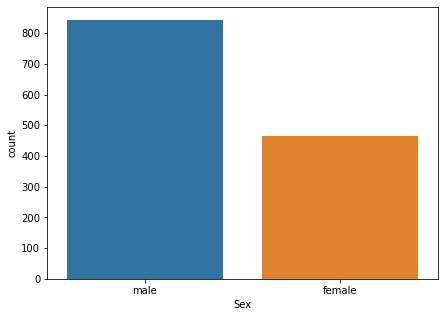

In [224]:
plt.figure(figsize = (7, 5))
sns.countplot('Sex',data = data)

In [253]:
data["Sex"].value_counts( )

male      843
female    466
Name: Sex, dtype: int64

In [ ]:
# On the Titanic the number of men was almost double that of women.

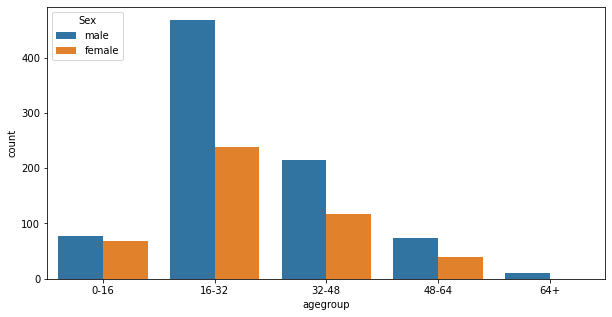

In [237]:
plt.figure(figsize = (10, 5))
sns.countplot('agegroup', hue="Sex", data = data)

In [254]:
data["agegroup"].value_counts( )

16-32    707
32-48    332
0-16     146
48-64    113
64+       11
Name: agegroup, dtype: int64

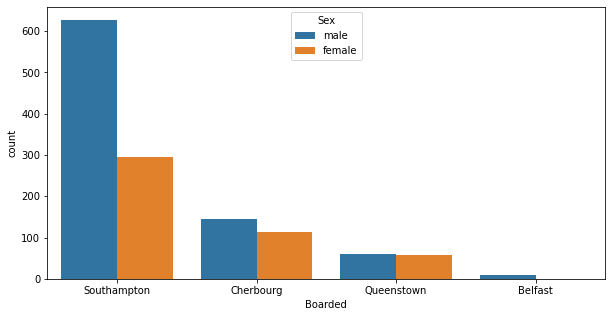

In [250]:
plt.figure(figsize = (10, 5))
sns.countplot('Boarded', hue="Sex", data = data)

In [287]:
data["Hometown"].groupby(data["Hometown"]).count().sort_values(ascending=False)[0:10]

Hometown
New York, New York, US                   70
London, England                          49
London, England, UK                      30
Paris, France                            23
Montreal, Quebec, Canada                 20
Hardîne, Lebanon                         17
Unknown, Bulgaria                        16
Philadelphia, Pennsylvania, US           15
Peterborough, Cambridgeshire, England    11
Athlone, Westmeath, Ireland               9
Name: Hometown, dtype: int64

In [318]:
city_wise = data["Destination"].groupby(data["Hometown"]).count().sort_values(ascending = False)[0:8]

In [319]:
city_wise = pd.DataFrame(city_wise)
cw1 = city_wise.reset_index()

In [320]:
cw1.head()

,Hometown,Destination
0,"New York, New York, US",70
1,"London, England",49
2,"London, England, UK",30
3,"Paris, France",23
4,"Montreal, Quebec, Canada",20


In [331]:
by_city1 = sns.barplot(x='Sex', y='Hometown', data = cw1, palette = 'coolwarm_r')

ValueError: Could not interpret input 'Sex'

In [ ]:
fig=plt.gcf()
fig.set_size_inches(11,10)
sns.despine(left=True)
by_city.set_title('Cases based on Cities')
by_city.set_ylabel('Number of Cases')

In [323]:
city_wise2 = data["Sex"].groupby(data["Destination"]).count().sort_values(ascending = False)[0:8]

In [324]:
city_wise2 = pd.DataFrame(city_wise2)
cw2 = city_wise2.reset_index()

In [325]:
cw2.head()

,Destination,Sex
0,New York City,239
1,"New York, New York, US",127
2,"Chicago, Illinois, US",75
3,"Montreal, Quebec, Canada",37
4,"Detroit, Michigan, US",28


In [326]:
by_city2 = sns.barplot(x='city', y='manner_of_death', data = cw2, palette = 'coolwarm_r')
fig=plt.gcf()
fig.set_size_inches(11,10)
sns.despine(left=True)
by_city.set_title('Destination')
by_city.set_ylabel('Number of Passengers')

ValueError: Could not interpret input 'city'

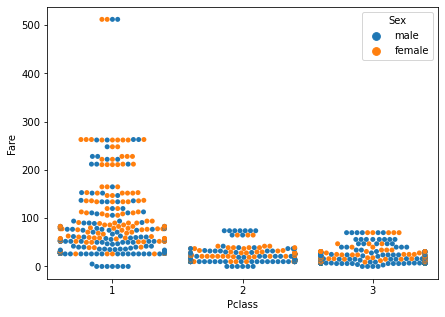

In [249]:
plt.figure(figsize = (7, 5))
sns.swarmplot(x="Pclass", y="Fare", hue="Sex", data=data)

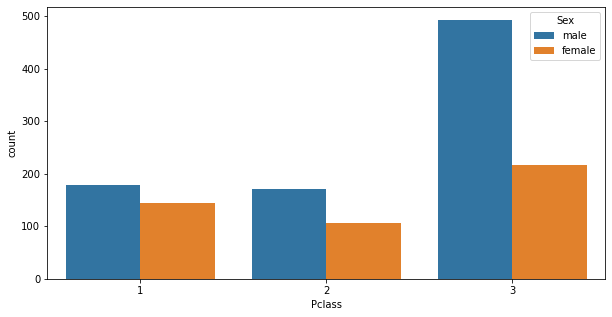

In [268]:
plt.figure(figsize = (10, 5))
sns.countplot('Pclass', hue="Sex", data = data)

In [271]:
data["Pclass"].value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

In [ ]:
# The third class had the most passengers. In Pclass two and one there were almost the same number of men. 
# The number of women in these two Pclasses also shows no great difference.

In [283]:
data[data["Pclass"]==1]["Sex"].value_counts()

male      179
female    144
Name: Sex, dtype: int64

In [284]:
data[data["Pclass"]==2]["Sex"].value_counts()

male      171
female    106
Name: Sex, dtype: int64

In [285]:
data[data["Pclass"]==3]["Sex"].value_counts()

male      493
female    216
Name: Sex, dtype: int64

In [ ]:
# Pclass 1 and Pclass 2 have almost the same number of men.

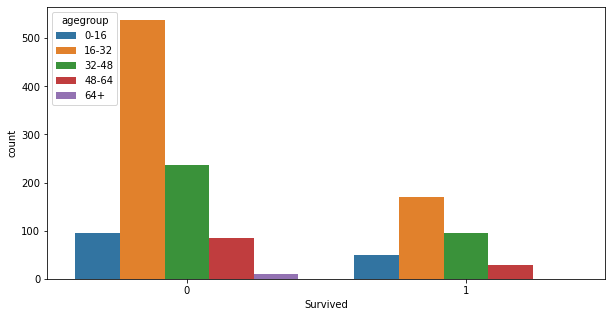

In [328]:
plt.figure(figsize = (10, 5))
sns.countplot('Survived', hue="agegroup", data = data)

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Hometown,Boarded,Destination,Class,agegroup
0,1,0,3,male,1,0,7.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",3,16-32
1,2,1,1,female,1,0,71.0,"New York, New York, US",Cherbourg,"New York, New York, US",1,32-48
2,3,1,3,female,0,0,8.0,"Jyväskylä, Finland",Southampton,New York City,3,16-32
3,4,1,1,female,1,0,53.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",1,32-48
4,5,0,3,male,0,0,8.0,"Birmingham, West Midlands, England",Southampton,New York City,3,32-48


In [332]:
# schauen nach male-female